# Import files

In [1]:
from Strats.PairTradingStrat import *
from Strats.PortfolioMetrics import *

import warnings

warnings.filterwarnings("ignore")

In [2]:
# Get all available tickers
response = requests.get(f"{BASE_URL}/ticker/price")
data = response.json()
BTC_pairs = [i["symbol"] for i in data if "BTC" in i["symbol"]]


In [3]:
coint_pairs = get_coint_pairs(BTC_pairs, interval = '1d', start_date="2023-01-01", end_date="2023-12-31")
len(coint_pairs)

100%|██████████| 524/524 [02:23<00:00,  3.66it/s]


28

In [29]:
test_pair = coint_pairs[27]
print(test_pair)

symbol_manager = BinanceSymbolManager()
# Add symbols
print(symbol_manager.add_symbol(test_pair))  # Success

price_fetcher = BinancePriceFetcher(symbol_manager.get_symbols())
# Fetch pair historical price
pair_portfolio = price_fetcher.get_grp_historical_ohlcv(
        interval="1d",
        start_date="2023-01-01",
        end_date="2024-12-31"
    )

pair_portfolio

NFPBTC
'NFPBTC' added successfully.


,timestamp,NFPBTC
0,2023-12-27,0.000027
1,2023-12-28,0.000021
2,2023-12-29,0.000024
3,2023-12-30,0.000023
4,2023-12-31,0.000021
...,...,...
366,2024-12-27,0.000003
367,2024-12-28,0.000003
368,2024-12-29,0.000003
369,2024-12-30,0.000003


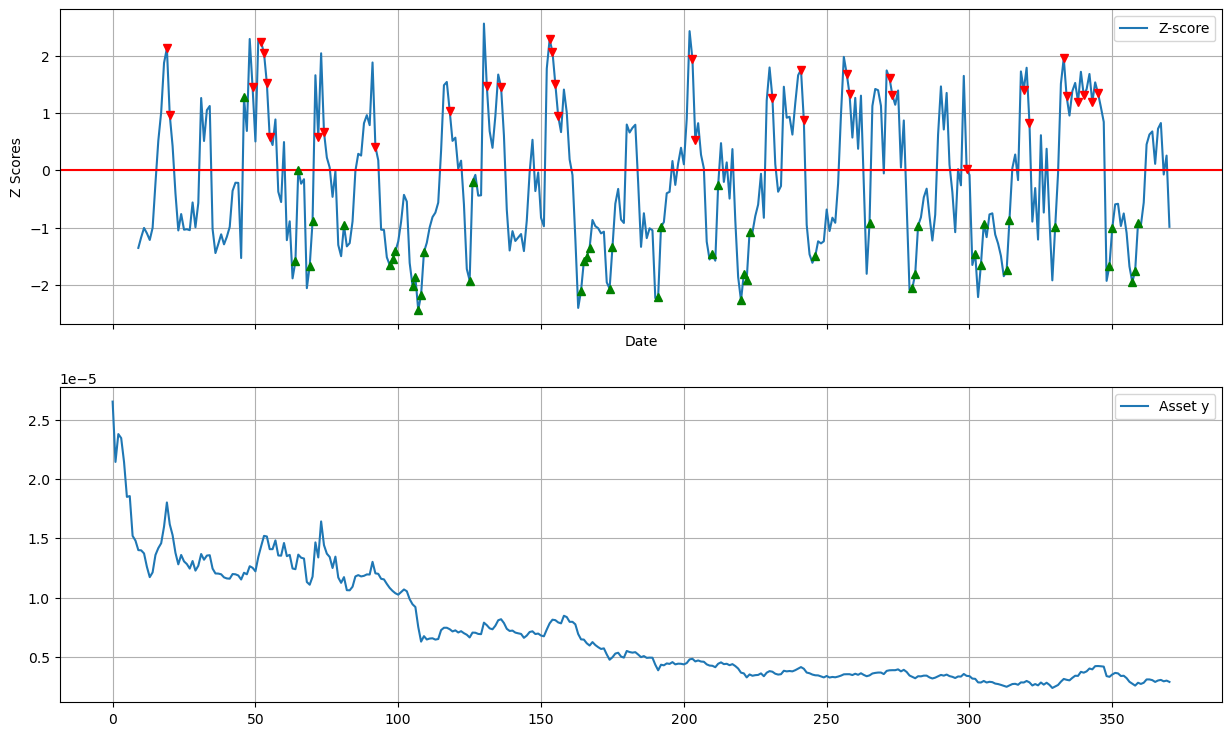

In [30]:
model = pair_trading(pair_portfolio.copy())
spread = model.generate_signals(lookback=10, threshold=1.5)
model.plot_signals()

In [31]:
pnl_df = model.computePnL(test_start_date="2024-01-01")
pnl_df

,Date,Price,Signal,Positions,Realized_PnL,Unrealized_PnL,Daily_PnL,PnL_Total
0,2024-01-01,0.000018,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,2024-01-02,0.000019,0.0,0.0,0.000000,-0.000000,0.000000,0.000000
2,2024-01-03,0.000015,0.0,0.0,0.000000,-0.000000,0.000000,0.000000
3,2024-01-04,0.000015,0.0,0.0,0.000000,-0.000000,0.000000,0.000000
4,2024-01-05,0.000014,0.0,0.0,0.000000,-0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
361,2024-12-27,0.000003,0.0,11.0,0.000031,0.000002,0.000002,0.000034
362,2024-12-28,0.000003,0.0,11.0,0.000031,0.000002,0.000002,0.000033
363,2024-12-29,0.000003,0.0,11.0,0.000031,0.000003,0.000003,0.000034
364,2024-12-30,0.000003,0.0,11.0,0.000031,0.000002,0.000002,0.000034


In [32]:
returns = pnl_df[("Daily_PnL")]

port_metrics = PortfolioMetrics(returns.dropna())
summary = port_metrics.summary(risk_free_rate=0)
print(summary)

         Annualized Return  Annualized Volatility  Sharpe Ratio  \
Returns           0.001125               0.000064     17.678368   

         Max Drawdown Duration  Max Drawdown  Calmar Ratio  Skewness  \
Returns                     42     -0.000039     28.684847  0.075547   

         Kurtosis  VaR (5%)  CVaR (5%)  Tail Ratio  Omega Ratio  
Returns  -0.53327 -0.000001  -0.000003    7.545742    24.788197  
